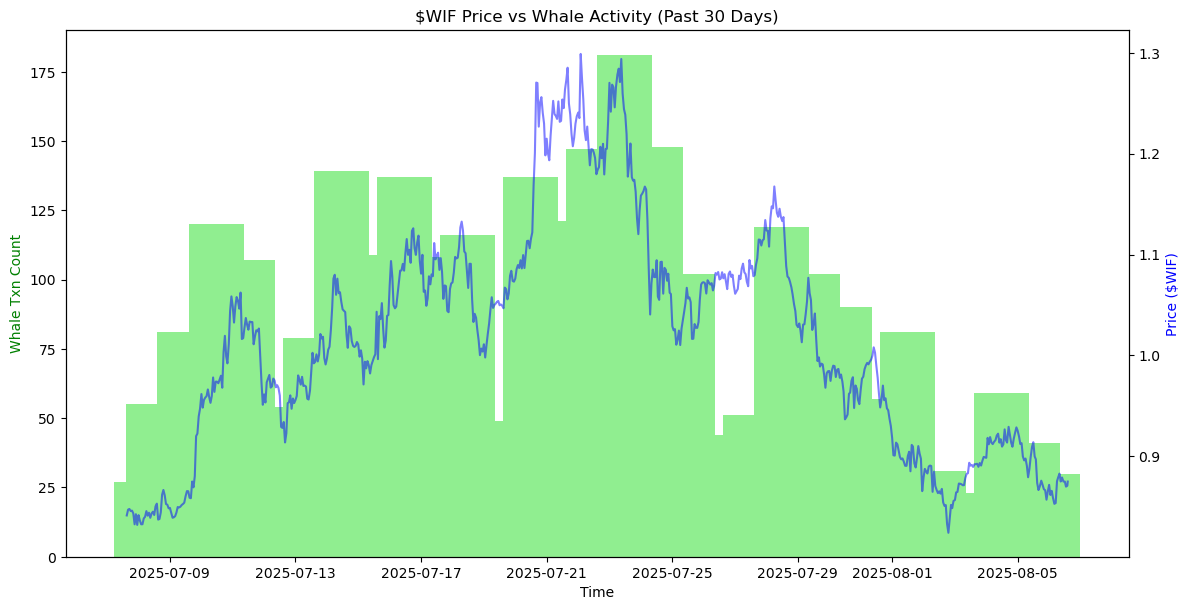

In [9]:
import matplotlib.pyplot as plt
from joblib import load


# Load merged data
df = load("C:/Users/DELL/Documents/Data Science and Analytics/Mini Capstone/minic/Database/merged_wif_data.joblib")


fig, ax1 = plt.subplots(figsize=(12,6))


ax1.set_ylabel("Whale Count", color="blue")


# Bar chart for whale activity
ax1.bar(df.index, df['whale_tx_count'], color='lightgreen', label='Whale Txn Count')

# Line chart for price change
ax2 = ax1.twinx()
ax2.plot(df.index, df['price'], color='blue', alpha=0.5, label='Price ($)')

ax1.set_xlabel('Time')
ax2.set_ylabel('Price ($WIF)', color='blue')
ax1.set_ylabel('Whale Txn Count', color='green')
fig.tight_layout()
plt.title('$WIF Price vs Whale Activity (Past 30 Days)')
plt.show()


### Correlation Matrix and Price Change Analysis

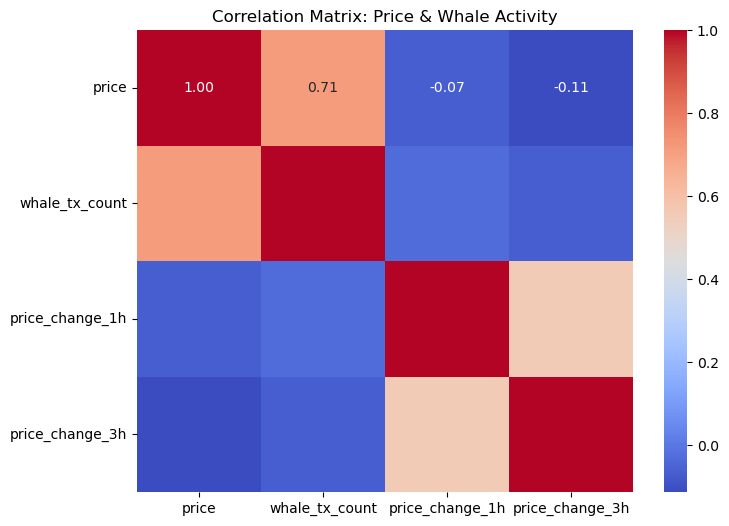

In [2]:
import seaborn as sns

# Calculate 1-hour and 3-hour price changes
df['price_change_1h'] = df['price'].shift(-1) - df['price']
df['price_change_3h'] = df['price'].shift(-3) - df['price']

# Drop rows with NaNs due to shifting
df_clean = df.dropna(subset=['price_change_1h', 'price_change_3h'])

# Correlation matrix
corr = df_clean[['price', 'whale_tx_count', 'price_change_1h', 'price_change_3h']].corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: Price & Whale Activity')
plt.show()


#### Insight: 

From the Correlation Matrix above, whale transactions are strongly correlated with $WIF's price level, but not necessarily with short-term price changes (hourly deltas). This means that whales might not cause immediate volatility, but their presence is related to sustained price levels.

### Price Change Distribution

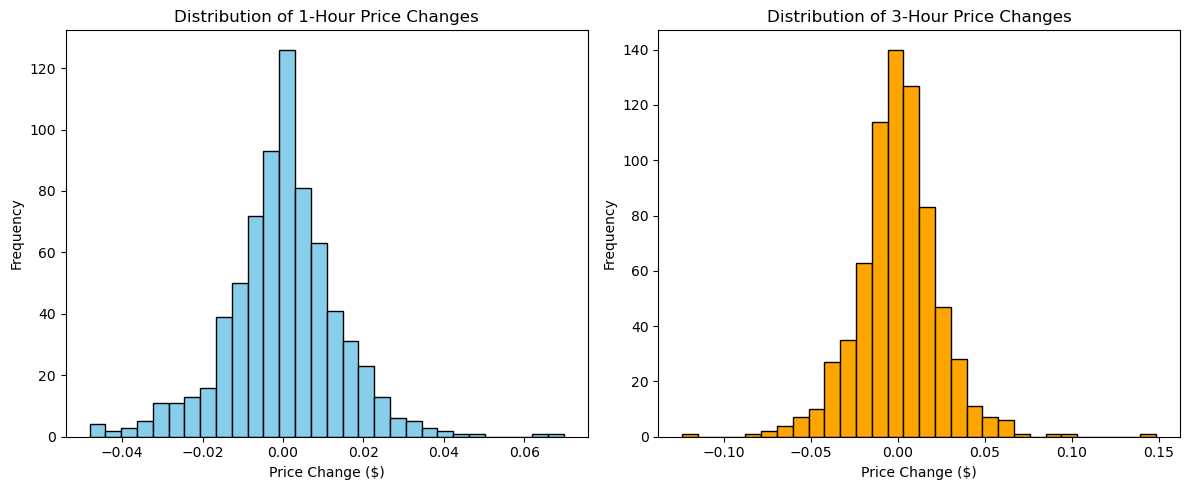

In [3]:
# Histogram of price changes (1h and 3h)
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.hist(df_clean['price_change_1h'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of 1-Hour Price Changes')
plt.xlabel('Price Change ($)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df_clean['price_change_3h'], bins=30, color='orange', edgecolor='black')
plt.title('Distribution of 3-Hour Price Changes')
plt.xlabel('Price Change ($)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


#### Insight:

**Left Plot – 1-Hour Price Changes:**
 - Symmetrical, bell-curve shaped.
 - Most price changes fall between -2% and +2%.
 - Slight skew to the left: more small losses than gains.

**Right Plot – 3-Hour Price Changes:**
 - Wider spread — price changes range from -10% to +10%, occasionally more.
 - Still roughly bell-shaped but slightly more volatile.
 - A few outliers suggest larger swings in 3-hour windows, potentially due to external news or coordinated activity.


Summary:
Short-term (1-hour) price movements are fairly stable and mostly small.

Mid-term (3-hour) movements show more volatility, suggesting WIF may have reactive surges/dumps that develop within a few hours.

There’s no extreme skew in either — suggesting no consistent uptrend/downtrend pressure in those timeframes (at least recently).